In [1]:
# offizielle libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# selbstgeschrieben
import file_organizer as fo
from func import get_norm_cm
from func import ticks_handle

### Filter TC 

In [3]:
path = "data_day_one"
file_list = fo.load_file_list(path)
selection = fo.select_files(file_list, "meas", "A")
data = fo.load_files(selection)
data = fo.df_combine(data)
del data["iout"]
data["time"]=data["time"]*1000
label = list(data.columns)
label.remove('time')
legends=["Min (<0.01) ms","0.033 ms","0.33 ms"]

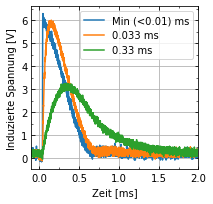

In [4]:
fig,(ax)=plt.subplots(1,1, figsize=(3,3))

data.plot(x="time",y=label,ax=ax,label=legends)
#ax.set_title("Einfluss der Filter-TC-Zeit")
ax.legend()
ax.set_xlim((-0.1,2))
ax.set_ylabel("Induzierte Spannung [V]")
ax.grid()
ax.set_xlabel("Zeit [ms]")
ax.set_ylabel("Induzierte Spannung [V]")

ticks_handle(ax, which='both')
fig.savefig('IMAGES/param_filterTC.png', dpi=300,bbox_inches='tight')
plt.show()

### Magnetfeldgradient

In [5]:
path = "data_day_one"
file_list = fo.load_file_list(path)
selection = fo.select_files(file_list, "meas", "C")
data = fo.load_files(selection)
#data = fo.df_combine(data)
#del data["iout"]
for d in data:
    d["time"]=d["time"]*1000
#label = list(data.columns)
#label.remove('time')
#day one D bzw C für magnetfeld, day three Q

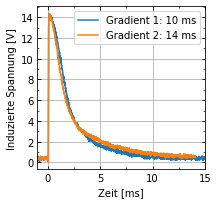

In [6]:
fig,(ax)=plt.subplots(1,1, figsize=(3,3))
data[0].plot(x="time",y="signal",ax=ax)
data[1].plot(x="time",y="signal",ax=ax)
plt.legend(["Gradient 1: 10 ms","Gradient 2: 14 ms"])
ax.grid()
ax.set_xlim((-1,15))
ax.set_xlabel("Zeit [ms]")
ax.set_ylabel("Induzierte Spannung [V]")
#ax.set_title("Einfluss B-Feldgradient auf Zerfallszeit")
ticks_handle(ax, which='both')
fig.savefig('IMAGES/param_bgradient.png', dpi=300,bbox_inches='tight')
plt.show()

### Detuning

In [7]:
path = "data_day_one"
file_list = fo.load_file_list(path)
selection = fo.select_files(file_list, "meas", "D")
data = fo.load_files(selection)
data = fo.df_combine(data)
del data["iout"]

data["time"]=data["time"]*1000
label = list(data.columns)
label.remove('time')
#day one D bzw C für magnetfeld, day three Q

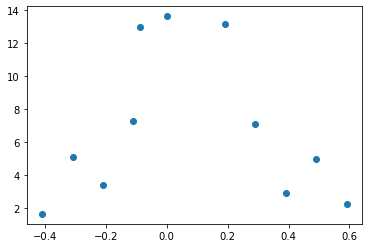

In [8]:
F = np.array([float(m.F) for m in selection]) #MHz
detuning= F[0]-F
Imax= [np.max(data[l]) for l in label]
plt.scatter(detuning,Imax)

In [9]:
[str(round(d,3)) for d in detuning]

['0.0',
 '0.191',
 '0.291',
 '0.391',
 '0.491',
 '0.591',
 '-0.089',
 '-0.109',
 '-0.209',
 '-0.309',
 '-0.409']

#### Fitten

In [10]:
from lmfit.models import GaussianModel
res = GaussianModel().fit(data=Imax,x=detuning)

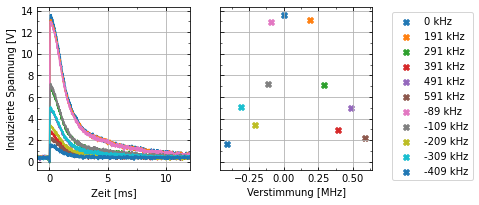

In [11]:
fig,(ax,bx)=plt.subplots(1,2, figsize=(6,3), sharey=True)
data.plot(x="time",y=label,ax=ax)
ax.legend().remove()
for d, i in zip(detuning, Imax):
    bx.scatter(d,i,marker="X",label=(str(round(d*1000))+" kHz"))# for d in detuning])

#xeval=np.linspace(-.5,0.6,50)
#yeval=GaussianModel().eval(x=xeval,**res.params)
#bx.plot(xeval,yeval,"r--",label="Gauß-Fit, $\chi_{red}^2=5.1$")
ax.set_xlim((-1,12))
ax.set_ylabel("Induzierte Spannung [V]")
ax.set_xlabel("Zeit [ms]")
bx.set_xlabel("Verstimmung [MHz]")
ticks_handle(ax, which='both')
ticks_handle(bx, which='both')
ax.grid()
bx.grid()
bx.legend(loc='upper left',bbox_to_anchor=(1.1, 1))

fig.savefig('IMAGES/param_detuning.png', dpi=300,bbox_inches='tight')
plt.show()

In [12]:
res.best_fit
res.params
res

### Detuning Magnetfeld

In [13]:
path = "data_day_two"
file_list = fo.load_file_list(path)
selection = fo.select_files(file_list, "meas", "L")

In [14]:
import os.path
from datetime import datetime
from file_organizer import Meas 

def get_creation_time(meas: Meas, path=None) -> datetime:
    filename = meas.filename
    if path: # falls path angegeben: hinzufügen
        filename = os.path.join(path,filename)
    assert os.path.isfile(filename)
    ctime = os.path.getctime(filename) # returns time in s since 1970
    dt = datetime.fromtimestamp(ctime) # return datetime-object
    return dt

In [15]:
get_creation_time(selection[0], path=path)

datetime.datetime(2022, 1, 14, 10, 51)

Problem: in deppnote ist hier alles das Import datum der Datei. Ich teste das mal lokal

In [16]:
import pandas as pd
df = pd.read_csv('datetime.csv')

In [17]:
def get_datetime(meas: Meas):
    filename= meas.filename
    df = pd.read_csv('datetime.csv')

    result = list(df[df['filename'] == filename]['datetime'])

    if len(result):
        return datetime.strptime(result[0],  '%Y-%m-%d %H:%M:%S')
    return None

In [18]:
#for meas in selection:
    #print(get_datetime(meas))
t0 = get_datetime(selection[0])

time = [(get_datetime(meas)-t0).seconds for meas in selection]

In [19]:
dir(t0)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [20]:
nmr_freq_proton=42.576 #Hz/T
time=np.array(time)
[float(meas.F) for meas in selection]
bfield= np.array([meas.F/nmr_freq_proton for meas in selection])
time= time[np.logical_not(np.isnan(bfield))]
bfield = bfield[np.logical_not(np.isnan(bfield))]


In [21]:
from lmfit.models import LinearModel
resb = LinearModel().fit(data=bfield,x=time)

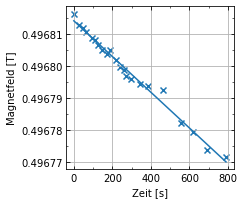

In [22]:
yb=LinearModel().eval(x=time,**resb.params)
fig,(ax)=plt.subplots(1,1, figsize=(3,3))
ax.scatter(time,bfield,marker="x")
ax.plot(time,yb)
ax.grid()

ax.set_xlabel("Zeit [s]")
ax.set_ylabel("Magnetfeld [T]")
# ax.set_title("B-Feld im Zeitverlauf")
ticks_handle(ax, which='both')
fig.savefig('IMAGES/param_bdetune.png', dpi=300,bbox_inches='tight')

plt.show()

In [23]:
resb.params

name,value,standard error,relative error,initial value,min,max,vary
slope,-5.5703e-08,1.4922e-09,(2.68%),1.0,-inf,inf,True
intercept,0.49681405,5.2631e-07,(0.00%),0.0,-inf,inf,True


In [24]:
from uncertainties import ufloat

tpermin=ufloat(-5.5703e-08,1.4922e-09)*60 #T/min
print(tpermin)

(-3.34+/-0.09)e-06
